======== Description of Dataset ========

Dataset name: ROFreq.zip
Total samples: 33 CSVs, corresponds to 33 chips.
Each chip has following data:
1. Each row indicates Trojan Free/ Trojan-inserted data.
2. Trojan Free (golden) data in row 1 and row 25
3. Trojan-inserted data in rows 2-24
4. Each column indicates the frequency of RO# in the network (RO1-RO8). For details, check Ref. [1]


[1]: Shane Kelly, Xuehui Zhang, Mohammed Tehranipoor, and Andrew Ferraiuolo, Detecting Hardware Trojans using On-
chip Sensors in an ASIC Design. Journal of Electronic Testing 31, no. 1 (2015): 11-26.

Choice of Classifiers(Pick Two):

Case 1. You have some known samples of both Golden chips and Trojan-inserted chips. (i.e., RO data from both 
types  of  chips  are  known),  and  both  can  be  used  for  training  the  classifier.  (However,  the  type  of  Trojan  is 
unknown.) 

Case 2. You only have some known samples of Golden chips, i.e., only golden data can be used for training the 
classifier. 

Case 3. You have completely unidentified samples (no knowledge about the samples, whether they are golden, 
Trojan-inserted, or a mixture of both) to train the classifiers.

Evaluation of the classifier:

In [94]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
from openpyxl import load_workbook
import os



[18, 30, 26, 31, 21, 5, 16, 7, 3, 12, 25, 14, 20, 17, 15, 19, 23, 2, 24, 10]
### SVM ###

Training lasted 0.00 seconds
For C :  10 , Gamma:  1 , kernel = rbf  => Accuracy = 95.83

[13, 25, 10, 14, 5, 31, 23, 1, 24, 3, 17, 20, 18, 12, 29, 15, 16, 2, 7, 27]
### LR ###

Training lasted 0.00 seconds
Accuracy = 42.08

[27, 23, 21, 32, 12, 26, 25, 31, 7, 13, 4, 30, 20, 1, 29, 16, 11, 19, 3, 22]
### KNN ###

Training lasted 0.00 seconds
Accuracy = 84.17

[11, 25, 28, 21, 7, 24, 20, 4, 27, 32, 13, 23, 26, 2, 19, 0, 5, 8, 1, 15]
### GB ###

Training lasted 0.10 seconds
Accuracy = 87.29


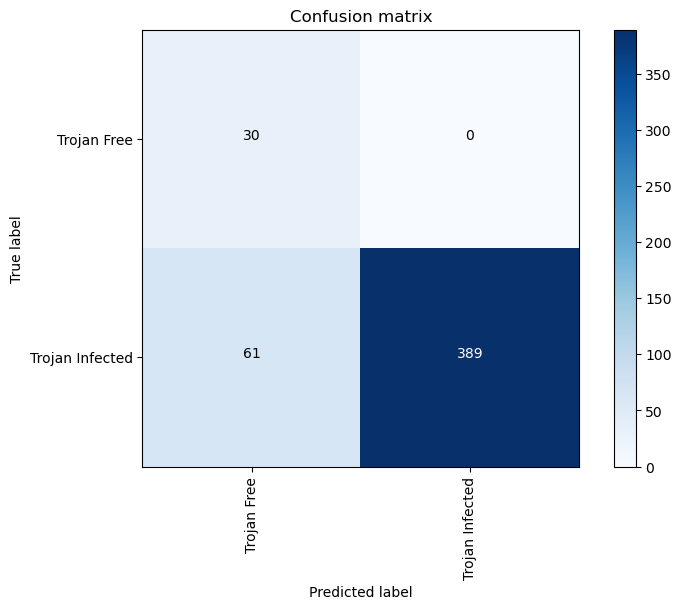

In [512]:
import pandas as pd
import numpy as np
import itertools
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from openpyxl import load_workbook
import os
import random
import time

def plot_confusion_matrix(cm, target_names, title, cmap=None, normalize=False):
    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=90)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.1f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def gradient_boosting():
    """
    This function performs classification with Gradient Boosting.
    """
    x_train, x_test, y_train, y_test = get_data()
    y_train = y_train.reshape((y_train.shape[0], ))
        
    clf = GradientBoostingClassifier(learning_rate=0.1, n_estimators=75)

    start = time.time()
    clf.fit(x_train, y_train)    
    end = time.time()

    y_pred = clf.predict(x_test)

    time_ = end - start
    accuracy = 100 * accuracy_score(y_test, y_pred)

    print("### GB ###\n")
    print("Training lasted %.2f seconds" % time_)
    print("Accuracy = %.2f" % (accuracy))

    
    conf_matrix = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm=conf_matrix, target_names=['Trojan Free','Trojan Infected'], title='Confusion matrix')
    # """ 
    return(time_, accuracy)


def k_neighbors():
    """
    This function performs classification with k neighbors algorithm.
    """
    x_train, x_test, y_train, y_test = get_data()
    y_train = y_train.reshape((y_train.shape[0], ))
          
    clf = KNeighborsClassifier(n_neighbors=3)
    
    start = time.time()
    clf.fit(x_train, y_train)
    end = time.time()

    y_pred = clf.predict(x_test)

    time_ = end - start
    accuracy = 100 * accuracy_score(y_test, y_pred)

    print("### KNN ###\n")
    print("Training lasted %.2f seconds" % time_)
    print("Accuracy = %.2f" % (accuracy))

    return(time_, accuracy)

def logistic_regression():
    """
    This function performs classification with logistic regression.
    """
    x_train, x_test, y_train, y_test = get_data()
    y_train = y_train.reshape((y_train.shape[0], ))

    clf = LogisticRegression(random_state=0, solver='liblinear', max_iter=300,
                             multi_class='ovr')
    start = time.time()
    clf.fit(x_train, y_train)
    end = time.time()
    
    y_pred = clf.predict(x_test)

    time_ = end - start
    accuracy = 100 * accuracy_score(y_test, y_pred)

    print("### LR ###\n")
    print("Training lasted %.2f seconds" % time_)
    print("Accuracy = %.2f" % (accuracy))

    return(time_, accuracy)


def support_vector_machine():

    x_train, x_test, y_train, y_test = get_data()
    y_train = y_train.reshape((y_train.shape[0], ))
  
    classifier = SVC(kernel="rbf", C=10, gamma=1)

    start = time.time()
    classifier.fit(x_train, y_train)
    end = time.time()

    y_pred = classifier.predict(x_test)

    time_ = end - start
    accuracy = 100 * accuracy_score(y_test, y_pred)
    
    print("### SVM ###\n")
    print("Training lasted %.2f seconds" % time_)
    print("For C : ", 10, ", Gamma: ", 1, ", kernel = rbf",
          " => Accuracy = %.2f" % (accuracy))
        

    return(time_, accuracy)

def prepare_data():
    excel_files = []
    path = os.getcwd() + '/ROFreq'
    for file in os.listdir(path):
        if file.endswith('.xlsx'):
            excel_files.append(file)


    labels = []
    labels.extend([1 for i in range(0,25)])
    labels[0] = 0
    labels[24] = 0

    df_list = []
    for file in excel_files: 
        df = pd.read_excel(f'ROFreq/{file}',header=None)
        df['labels'] = labels
        df_list.append(df)

    return df_list

def separate_train_test_data(data, samples, case):
    mask = data['labels'] == 0

    trojan_free = []
    trojan_inserted = []

    if(case == 1):
        trojan_free = data.index[mask].tolist()
        trojan_inserted = data.index[~mask].tolist()
        train_data_idx = random.sample(trojan_free,int(samples/2)) + random.sample(trojan_inserted,int(samples/2))
    elif(case == 2):
        trojan_free = data.index[mask].tolist()
        train_data_idx = trojan_free
        train_data_idx = random.sample(train_data_idx,samples)
    elif(case == 3):
        train_data_idx = random.sample(range(0,data.shape[0]),samples)

    
    x_train = data.loc[train_data_idx].reset_index(drop=True)

    test_data_idx = [i for i in range(0,data.shape[0]) if i not in train_data_idx]
    x_test = data.loc[test_data_idx].reset_index(drop=True)

    y_train = pd.DataFrame(x_train['labels']).values
    y_test = pd.DataFrame(x_test['labels']).values
    x_train = x_train.drop(['labels'],axis=1)
    x_test = x_test.drop(['labels'],axis=1)
    return (x_train, x_test, y_train, y_test)

def process_training_test_data(chips, samples, case):
    trojan_free = []
    trojan_inserted = []

    train_data_idx = random.sample(range(0,33),samples)
    test_data_idx = [i for i in range(0,33) if i not in train_data_idx]
    
    
    print(train_data_idx)
    data = [chips[i] for i in train_data_idx]
    data = pd.concat(data,ignore_index=True)


    # test_data = [chips[i] for i in test_idx]
    # test_data = pd.concat(test_data,ignore_index=True)

    (x_train, x_test, y_train, y_test) = separate_train_test_data(data, samples, case)

    # print(train_data)
    # print(test_data)


    return (x_train, x_test, y_train, y_test)

# def train_test_split(train_data,test_data):
#     scaler = MinMaxScaler(feature_range=(0, 1))

#     y_train = pd.DataFrame(train_data['labels']).values
#     x_train = train_data.drop(['labels'], axis=1)
   
#     x_test = test_data.drop(['labels'], axis=1)
#     y_test = pd.DataFrame(test_data['labels']).values

#     x_train = scaler.fit_transform(x_train)
#     x_test = scaler.fit_transform(x_test)


#     return (x_train, x_test, y_train, y_test)

def get_data():
    chips = prepare_data()

    # 6 samples
    # Case 1: 3TF, 3TI
    samples = 20
    case = 1
 
    return process_training_test_data(chips,samples,case)
def main():

    # x_train, x_test, y_train, y_test = get_data()
    # print(x_train)
    # print(y_train)
    # print(x_test)
    # print(y_test)
    
    support_vector_machine()
    print()
    logistic_regression()
    print()
    k_neighbors()
    print()
    gradient_boosting()

if __name__ == '__main__':
    main()

In [177]:
print(range(1,33))

range(1, 33)


In [80]:
df = pd.DataFrame(data, columns=data.columns)
df.head()
# df.describe()

,RO1,RO2,RO3,RO4,RO5,RO6,RO7,RO8,labels
0,189.2,201.2,223.2,234.4,220.8,226.4,220.0,249.2,Trojan Free
1,177.2,188.0,208.8,219.2,206.4,212.0,205.2,232.8,Trojan Inserted
2,171.2,181.6,201.6,211.6,199.6,204.8,198.8,224.8,Trojan Inserted
3,167.2,177.6,197.2,206.8,195.2,200.4,194.0,220.0,Trojan Inserted
4,163.6,174.0,193.2,202.8,191.2,196.4,190.0,215.6,Trojan Inserted


      RO1    RO2    RO3    RO4    RO5    RO6    RO7    RO8
22  140.8  150.0  166.4  175.2  164.8  169.6  164.0  186.0
17  173.2  183.6  203.6  214.0  201.6  207.2  200.8  227.6
8   168.4  178.8  198.4  208.0  196.4  201.6  195.2  221.6
19  160.4  170.0  188.8  198.4  186.8  192.0  186.0  210.4
12  176.8  187.6  208.0  218.8  205.6  211.2  204.8  232.4
5   160.4  170.0  188.8  198.4  186.8  191.6  185.6  210.4
3   167.2  177.6  197.2  206.8  195.2  200.4  194.0  220.0
16  180.0  191.2  212.0  222.4  209.6  215.6  208.8  236.8
14  172.4  182.8  202.8  213.2  201.2  206.0  200.0  226.4
9   183.6  194.8  216.4  226.8  213.6  219.6  212.8  241.6
0   189.2  201.2  223.2  234.4  220.8  226.4  220.0  249.2
15  170.0  180.8  200.8  210.4  198.4  203.2  197.6  223.6
20  153.2  162.4  180.4  189.6  178.8  183.2  178.0  201.2
23  140.8  149.6  166.0  175.2  164.4  169.2  164.0  186.0
11  178.8  189.6  210.4  218.8  208.0  213.6  206.8  234.8
7   152.0  161.2  179.6  188.0  177.6  182.0  176.4  200